# Table of contents:
* [Introduction:Business Problem](#first-bullet)
* [Data](#second-bullet)
* [Methodology](#third-bullet)
* [Data acquisition and analysis](#fourth-bullet)
* [Results and discussion](#fifth-bullet)
* [Conclusion](#sixth-bullet)

# <a class="anchor" id="first-bullet"> Introduction:Business Problem </a>

A group of investors wants to open a fine dining restaurant in the Miami, Florida.
By using available data and taking into consideration multiple parameters for every neighborhood in Miami, we will make recommendations to the investors about the possible ideal neighborhoods for their restaurant and its suggested cuisine.


# <a class="anchor" id="second-bullet">Data</a>

1) Neighborhood information(Names,coordinates) scraped from wikipedia

2) Miami demographic data scraped from wikipedia

3) Florida's detailed demographic data in csv 

4) Miami economic data in csv 

5) Existing restaurant informaton using foursquare API 

# <a class="anchor" id="third-bullet">Methodology</a>

Firstly we will use Miami's and Florida's demographic data in order to get information about population's characteristics.This will help us decide the restaurants' suggested cuisine . Then we will get information of nearby venues for every neighborhood in Miami by using Foursquare API. The frequency of already existing restaurants and the economic data will help us locate the ideal neighborhood for our investors.

# <a class="anchor" id="fourth-bullet">Data acquisition and analysis</a>

# Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests
from pandas.io.json import json_normalize 


import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

In [2]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


# Data scraping from Wiki and creating a dataframe to store information about Miami's neighborhoods

In [3]:
website_url=requests.get('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami').text

In [ ]:
!pip install beautifulsoup4
!pip install lxml

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

In [ ]:
My_table=soup.find('table',{'class':'wikitable sortable'})
My_table

In [7]:
table_rows =My_table.find_all('tr')

In [8]:
data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df = pd.DataFrame(data, columns=['Neighborhood', 'Denonym', 'Population','Population/sqkm','Sub','Coordinates'])
df

,Neighborhood,Denonym,Population,Population/sqkm,Sub,Coordinates
0,None,None,None,None,None,None
1,Allapattah,,"54,289","4,401",,"25.815,-80.224"
2,Arts & Entertainment District,,"11,033","7,948",,"25.799,-80.190"
3,Brickell,Brickellite,"31,759","14,541",West Brickell,"25.758,-80.193"
4,Buena Vista,,"9,058","3,540",Buena Vista East Historic District and Design ...,"25.813,-80.192"
5,Coconut Grove,Grovite,"20,076","3,091","Center Grove, Northeast Coconut Grove, Southwe...","25.712,-80.257"
6,Coral Way,,"35,062","4,496","Coral Gate, Golden Pines, Shenandoah, Historic...","25.750,-80.283"
7,Design District,,"3,573","3,623",,"25.813,-80.193"
8,Downtown,Downtowner,"71,000 (13,635 CBD only)","10,613","Brickell, Central Business District (CBD), Dow...","25.774,-80.193"
9,Edgewater,,"15,005","6,675",,"25.802,-80.190"


# Data cleaning

In [9]:
df.drop(['Denonym', 'Population','Population/sqkm','Sub'], axis=1, inplace=True)

In [10]:
df.drop(df.index[[0,12,26]], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Neighborhood,Coordinates
1,Allapattah,"25.815,-80.224"
2,Arts & Entertainment District,"25.799,-80.190"
3,Brickell,"25.758,-80.193"
4,Buena Vista,"25.813,-80.192"
5,Coconut Grove,"25.712,-80.257"
6,Coral Way,"25.750,-80.283"
7,Design District,"25.813,-80.193"
8,Downtown,"25.774,-80.193"
9,Edgewater,"25.802,-80.190"
10,Flagami,"25.762,-80.316"


In [11]:
df['Latitude'], df['Longitude'] = df['Coordinates'].str.split(',', 1).str
df

,Neighborhood,Coordinates,Latitude,Longitude
1,Allapattah,"25.815,-80.224",25.815,-80.224
2,Arts & Entertainment District,"25.799,-80.190",25.799,-80.190
3,Brickell,"25.758,-80.193",25.758,-80.193
4,Buena Vista,"25.813,-80.192",25.813,-80.192
5,Coconut Grove,"25.712,-80.257",25.712,-80.257
6,Coral Way,"25.750,-80.283",25.750,-80.283
7,Design District,"25.813,-80.193",25.813,-80.193
8,Downtown,"25.774,-80.193",25.774,-80.193
9,Edgewater,"25.802,-80.190",25.802,-80.190
10,Flagami,"25.762,-80.316",25.762,-80.316


# Following we find the coordinates of Miami using geolocator and we visualize the map 

In [12]:
address = 'Miami, Florida'

geolocator = Nominatim(user_agent="miami_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Miami are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Miami are 25.7742658, -80.1936589.


In [13]:
df.dtypes

Neighborhood    object
Coordinates     object
Latitude        object
Longitude       object
dtype: object

In [14]:
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

In [15]:
map_miami = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(label)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_miami)  
    
map_miami

# Then we scrape wiki again in order to get Miami's demographic data and we store them in a new dataframe

In [16]:
website_url2=requests.get('https://en.wikipedia.org/wiki/Miami').text

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url2,'lxml')
print(soup.prettify())

In [ ]:
My_table2=soup.find('table',{'class':'wikitable sortable collapsible'})
My_table2

In [19]:
table_rows2 =My_table2.find_all('tr')

In [20]:
data2 = []
for row in table_rows2:
    data2.append([t.text.strip() for t in row.find_all('td')])

df4 = pd.DataFrame(data2, columns=['Profile', '2010', '2000','1990','1980','1970','1960','1950','1940','1930','1920','1910'])
df4

,Profile,2010,2000,1990,1980,1970,1960,1950,1940,1930,1920,1910
0,None,None,None,None,None,None,None,None,None,None,None,None
1,White (Includes White Hispanics),72.6%,66.6%,65.6%,66.6%,76.6%,77.4%,83.7%,78.5%,77.3%,68.5%,58.7%
2,Hispanics,70.0%,65.8%,62.5%,55.9%,44.6%,17.6%,–,–,–,–,–
3,Black or African American,19.2%,22.3%,27.4%,25.1%,22.7%,22.4%,16.2%,21.4%,22.7%,31.3%,41.3%
4,Non-Hispanic White,11.9%,11.8%,12.2%,19.4%,41.7%,–,–,–,–,–,–
5,Other,4.2%,5.6%,6.4%,7.8%,0.4%,0.1,0.1,0.1,0.1,0.1,0.1
6,Asian,1.0%,0.7%,0.6%,0.5%,0.3%,–,–,–,–,–,–


#  Demographic data cleaning before visualization 

In [21]:
df4.drop(df4.index[[0]], inplace=True)
df4

,Profile,2010,2000,1990,1980,1970,1960,1950,1940,1930,1920,1910
1,White (Includes White Hispanics),72.6%,66.6%,65.6%,66.6%,76.6%,77.4%,83.7%,78.5%,77.3%,68.5%,58.7%
2,Hispanics,70.0%,65.8%,62.5%,55.9%,44.6%,17.6%,–,–,–,–,–
3,Black or African American,19.2%,22.3%,27.4%,25.1%,22.7%,22.4%,16.2%,21.4%,22.7%,31.3%,41.3%
4,Non-Hispanic White,11.9%,11.8%,12.2%,19.4%,41.7%,–,–,–,–,–,–
5,Other,4.2%,5.6%,6.4%,7.8%,0.4%,0.1,0.1,0.1,0.1,0.1,0.1
6,Asian,1.0%,0.7%,0.6%,0.5%,0.3%,–,–,–,–,–,–


In [22]:
df4.drop(['2000','1990','1980','1970','1960','1950','1940','1930','1920','1910'], axis=1, inplace=True)
df4

,Profile,2010
1,White (Includes White Hispanics),72.6%
2,Hispanics,70.0%
3,Black or African American,19.2%
4,Non-Hispanic White,11.9%
5,Other,4.2%
6,Asian,1.0%


In [23]:
df4.dtypes

Profile    object
2010       object
dtype: object

In [24]:
df4['Profile'] = df4['Profile'].astype(str)
df4.set_index('Profile', inplace=True)
df4

,2010
Profile,
White (Includes White Hispanics),72.6%
Hispanics,70.0%
Black or African American,19.2%
Non-Hispanic White,11.9%
Other,4.2%
Asian,1.0%


In [25]:
df4['2010'] = df4['2010'].str.rstrip('%').astype('float') / 100.0
df4

,2010
Profile,
White (Includes White Hispanics),0.726
Hispanics,0.700
Black or African American,0.192
Non-Hispanic White,0.119
Other,0.042
Asian,0.010


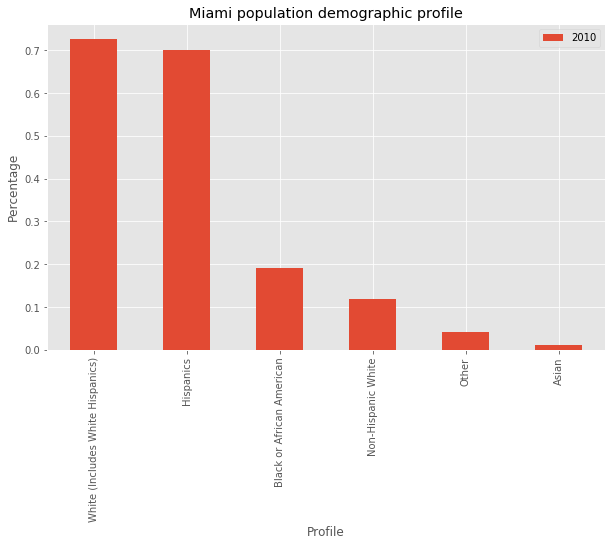

In [26]:
df4.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Profile') # add to x-label to the plot
plt.ylabel('Percentage') # add y-label to the plot
plt.title('Miami population demographic profile') # add title to the plot

plt.show()

<b>As we can see on the figure above, the majority of people in Miami have Hispanic origin.However that’s not enough for us in order to make a proper suggestion to the investors about the restaurant's cuisine. The U.S. government Office of Management and Budget has defined Hispanic or Latino people as "a person of Cuban, Mexican, Puerto Rican, South or Central American, or other Spanish culture or origin, regardless of race". In order to make our suggestion we will use more detailed demographic about Florida, due to data limitations about Miami.</b>

# Downloading Florida's detailed demographic data 

In [27]:
!wget -q -O 'global.csv' https://raw.githubusercontent.com/ptsartsa/ADSC/master/global.csv
print('Data downloaded!')

Data downloaded!


In [28]:
gl2=pd.read_csv('global.csv')
gl2.head()

,ID Birthplace,Birthplace,ID Year,Year,ID Nativity,Nativity,Country Code,Total Population,Geography,ID Geography
0,60,American Samoa,2018,2018,2,Foreign born,ASM,31,Florida,04000US12
1,554,"Other U.S. Island Areas, Oceania, Not Specifie...",2018,2018,2,Foreign born,NaN,680,Florida,04000US12
2,527,Samoa,2018,2018,2,Foreign born,WSM,305,Florida,04000US12
3,515,New Zealand,2018,2018,2,Foreign born,NZL,942,Florida,04000US12
4,512,Micronesia,2018,2018,2,Foreign born,KSM,707,Florida,04000US12


# Our data contained detailed information about the different birthplaces of Florida's citizen. We clean the data and then we visualize the top5 nationalities in Florida. 

In [ ]:
gl2.drop(['Nativity', 'Geography', 'ID Geography', 'ID Year', 'ID Nativity'], axis=1, inplace=True)
gl2

In [30]:
gl2 = gl2[gl2['Year'] == 2018]

In [31]:
gl3=gl2.sort_values(by=['Total Population'],ascending=False)
gl3.head()

,ID Birthplace,Birthplace,Year,Country Code,Total Population
81,327,Cuba,2018,CUB,1028508
76,332,Haiti,2018,HTI,339246
61,364,Colombia,2018,COL,285400
94,303,Mexico,2018,MEX,254426
74,333,Jamaica,2018,JAM,213763


In [ ]:
gl3['Birthplace'] = gl3['Birthplace'].astype(str)
gl3

In [33]:
gl3.set_index('Birthplace', inplace=True)


In [34]:
gl3

,ID Birthplace,Year,Country Code,Total Population
Birthplace,,,,
Cuba,327,2018,CUB,1028508
Haiti,332,2018,HTI,339246
Colombia,364,2018,COL,285400
Mexico,303,2018,MEX,254426
Jamaica,333,2018,JAM,213763
Venezuela,373,2018,VEN,202958
Nicaragua,315,2018,NIC,121464
Dominican Republic,329,2018,DOM,121078
Canada,301,2018,CAN,116859


In [35]:
gl3.drop(['ID Birthplace', 'Country Code'], axis=1, inplace=True)
gl3

,Year,Total Population
Birthplace,,
Cuba,2018,1028508
Haiti,2018,339246
Colombia,2018,285400
Mexico,2018,254426
Jamaica,2018,213763
Venezuela,2018,202958
Nicaragua,2018,121464
Dominican Republic,2018,121078
Canada,2018,116859


In [36]:
top5 = gl3['Total Population'].head(5)
top5

Birthplace
Cuba        1028508
Haiti        339246
Colombia     285400
Mexico       254426
Jamaica      213763
Name: Total Population, dtype: int64

In [37]:
df_top5=gl3['Total Population'].head(5)
df_top5

Birthplace
Cuba        1028508
Haiti        339246
Colombia     285400
Mexico       254426
Jamaica      213763
Name: Total Population, dtype: int64

In [38]:
df_top5 = df_top5.iloc[::-1]
df_top5

Birthplace
Jamaica      213763
Mexico       254426
Colombia     285400
Haiti        339246
Cuba        1028508
Name: Total Population, dtype: int64

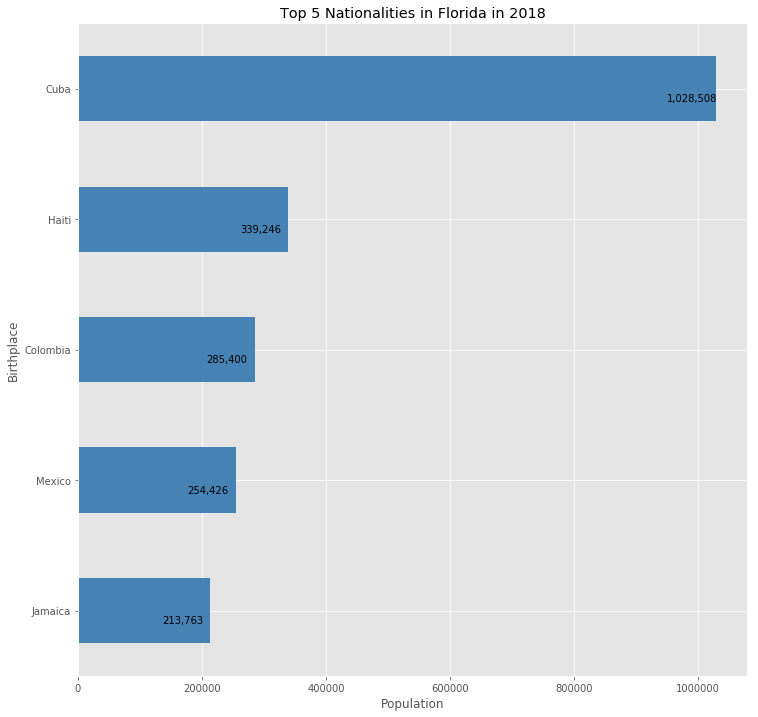

In [39]:
df_top5.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Population')
plt.title('Top 5 Nationalities in Florida in 2018')

for index, value in enumerate(df_top5): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 78000, index - 0.10), color='black')

plt.show()


<b> Over 1 million people living in Florida have cuban origins,almost 3 times more than people born in Haiti which is the second most common birthplace. As a result we will choose Cuban cuisine for our restaurants suggested menu and for further investigation. </b>

<b> Another parameter we have to take into consideration is the economic situation in different neighborhoods.Finding a good dataset about residents' average net earnings was almost impossible so i created and uploaded a csv file with data i found on google. </b>

# Downloading economic data,storing them in a dataframe and cleaning before analysis and visualization 

In [40]:
!wget -q -O 'avgearnings4.csv' https://raw.githubusercontent.com/ptsartsa/ADSC/master/avgearnings0.csv
print('Data downloaded3!')

Data downloaded3!


In [41]:
ear = pd.read_csv('avgearnings4.csv')   
ear.head()


,Neighborhood,Earnings
0,Allapattah,25.700
1,Arts & Entertainment District,70.597
2,Brickell,44.154
3,Buena Vista,33.666
4,Coconut Grove,77.685


In [42]:
ear.set_index('Neighborhood', inplace=True)
ear

,Earnings
Neighborhood,
Allapattah,25.700
Arts & Entertainment District,70.597
Brickell,44.154
Buena Vista,33.666
Coconut Grove,77.685
Coral Way,41.603
Design District,53.203
Downtown,38.001
Edgewater,37.205


In [43]:
ear['Earnings'] = ear['Earnings']* 1000
ear

,Earnings
Neighborhood,
Allapattah,25700.0
Arts & Entertainment District,70597.0
Brickell,44154.0
Buena Vista,33666.0
Coconut Grove,77685.0
Coral Way,41603.0
Design District,53203.0
Downtown,38001.0
Edgewater,37205.0


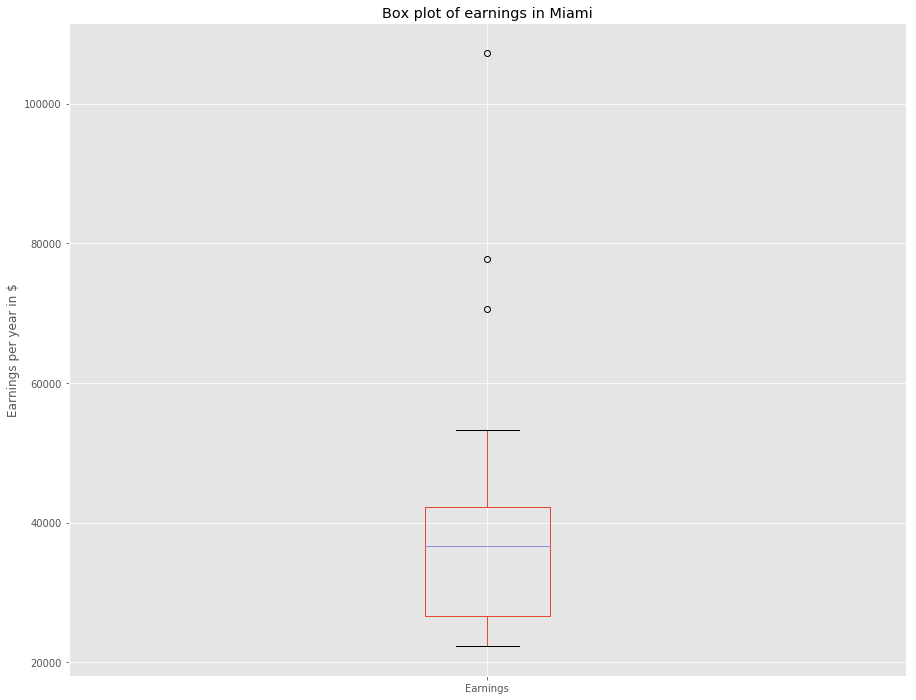

In [44]:
ear.plot(kind='box', figsize=(15, 12))

plt.title('Box plot of earnings in Miami')
plt.ylabel('Earnings per year in $')

plt.show()

In [45]:
ear.describe()

,Earnings
count,24.000000
mean,40506.458333
std,19734.836579
min,22292.000000
25%,26585.750000
50%,36589.500000
75%,42240.750000
max,107222.000000


In [46]:
ear.sort_values(by='Earnings', ascending=True, inplace=True)



ear_top5 = ear['Earnings'].tail(5)
ear_top5

Neighborhood
Upper Eastside                    44964.0
Design District                   53203.0
Arts & Entertainment District     70597.0
Coconut Grove                     77685.0
Venetian Islands                 107222.0
Name: Earnings, dtype: float64

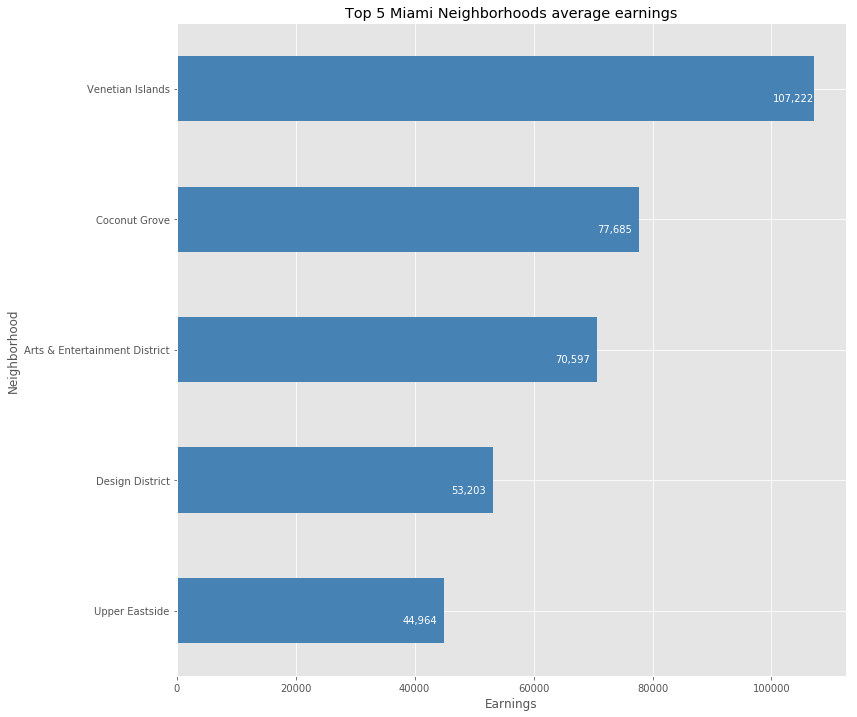

In [47]:
ear_top5.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Earnings')
plt.title('Top 5 Miami Neighborhoods average earnings')

for index, value in enumerate(ear_top5): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 7000, index - 0.10), color='white')

plt.show()

In [82]:
# The code was removed by Watson Studio for sharing.

# Then we define a function that gets the nearby venues using Foursquare API

In [49]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [50]:
LIMIT=100
radius=500

<b> Now its time run the above function on each neighborhood and create a new dataframe called miami_venues. </b> 

In [51]:
miami_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Allapattah
Arts & Entertainment District
Brickell
Buena Vista
Coconut Grove
Coral Way
Design District
Downtown
Edgewater
Flagami
Grapeland Heights
Liberty City
Little Haiti
Little Havana
Lummus Park
Midtown
Overtown
Park West
The Roads
Upper Eastside
Venetian Islands
Virginia Key
West Flagler
Wynwood


In [52]:
print(miami_venues.shape)
miami_venues.head()

(542, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allapattah,25.815,-80.224,Three Fingers Liquor & Lounge,25.815408,-80.224361,Lounge
1,Allapattah,25.815,-80.224,Ross,25.815820,-80.221753,Department Store
2,Arts & Entertainment District,25.799,-80.190,Bunnie Cakes,25.799544,-80.190953,Cupcake Shop
3,Arts & Entertainment District,25.799,-80.190,Bunbury Miami,25.798284,-80.191118,Wine Shop
4,Arts & Entertainment District,25.799,-80.190,Yodi's Threading Spa,25.800490,-80.189093,Spa


In [53]:
miami_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allapattah,2,2,2,2,2,2
Arts & Entertainment District,24,24,24,24,24,24
Brickell,55,55,55,55,55,55
Buena Vista,39,39,39,39,39,39
Coconut Grove,3,3,3,3,3,3
Coral Way,9,9,9,9,9,9
Design District,38,38,38,38,38,38
Downtown,65,65,65,65,65,65
Edgewater,47,47,47,47,47,47


<b> Analyze each neighborhood </b>

In [54]:
miami_onehot = pd.get_dummies(miami_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
miami_onehot['Neighborhood'] = miami_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [miami_onehot.columns[-1]] + list(miami_onehot.columns[:-1])
miami_onehot = miami_onehot[fixed_columns]

miami_onehot.head()

,Yoga Studio,Accessories Store,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beach,Big Box Store,Bistro,Boat or Ferry,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Empanada Restaurant,Event Space,Fast Food Restaurant,Fish Market,Flea Market,Food,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,Gift Shop,Gluten-free Restaurant,Golf Course,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Latin American Restaurant,Lawyer,Leather Goods Store,Liquor Store,Lounge,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Mobile Phone Shop,Motel,Motorcycle Shop,Moving Target,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Nutritionist,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Print Shop,Pub,Public Art,Record Shop,Rental Service,Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoothie Shop,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tennis Court,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Allapattah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allapattah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Arts & Entertainment District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Arts & Entertainment District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Arts & Entertainment District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<b>Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category </b>

In [55]:
miami_grouped = miami_onehot.groupby('Neighborhood').mean().reset_index()
miami_grouped

,Neighborhood,Yoga Studio,Accessories Store,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beach,Big Box Store,Bistro,Boat or Ferry,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Empanada Restaurant,Event Space,Fast Food Restaurant,Fish Market,Flea Market,Food,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,Gift Shop,Gluten-free Restaurant,Golf Course,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Latin American Restaurant,Lawyer,Leather Goods Store,Liquor Store,Lounge,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Mobile Phone Shop,Motel,Motorcycle Shop,Moving Target,Museum,Music Venue,New American Restaurant,Nightclub,Nutritionist,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Print Shop,Pub,Public Art,Record Shop,Rental Service,Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoothie Shop,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tennis Court,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,Allapattah,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,Arts & Entertainment District,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.041667,0.041667,0.000000,0.000000,0.000000,0.000000,0.041667,0.000,0.000,0.000000,0.000000,0.041667,0.041667,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.0,0.000000,0

Then we print each neighborhood along with the top 5 most common venues

In [56]:
num_top_venues = 5

for hood in miami_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = miami_grouped[miami_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allapattah----
              venue  freq
0            Lounge   0.5
1  Department Store   0.5
2       Pet Service   0.0
3         Nightclub   0.0
4      Nutritionist   0.0


----Arts & Entertainment District----
            venue  freq
0      Restaurant  0.12
1             Gym  0.08
2  Ice Cream Shop  0.08
3   Smoothie Shop  0.04
4      Food Truck  0.04


----Brickell----
                 venue  freq
0                Hotel  0.09
1   Italian Restaurant  0.07
2                 Café  0.05
3  Japanese Restaurant  0.05
4       Sandwich Place  0.04


----Buena Vista----
                venue  freq
0                Café  0.08
1            Boutique  0.05
2       Jewelry Store  0.05
3  Italian Restaurant  0.05
4         Art Gallery  0.05


----Coconut Grove----
                   venue  freq
0    American Restaurant  0.33
1          Boat or Ferry  0.33
2                   Park  0.33
3            Yoga Studio  0.00
4  Performing Arts Venue  0.00


----Coral Way----
          venue  freq
0  Liq

<b> We notice that cuban restaurant appears to be among the top 5 most common venues in a number of neighborhoods.Following we are going to focus our analysis on cuban restaurants. </b> 

In [57]:
"Cuban Restaurant" in miami_venues['Venue Category'].unique()

True

In [58]:
len(miami_grouped[miami_grouped["Cuban Restaurant"] > 0])

4

In [59]:
cuban = miami_grouped[["Neighborhood","Cuban Restaurant"]]

In [60]:
cuban.head()

,Neighborhood,Cuban Restaurant
0,Allapattah,0.000000
1,Arts & Entertainment District,0.041667
2,Brickell,0.000000
3,Buena Vista,0.000000
4,Coconut Grove,0.000000


<b> Then we cluster neighborhooods together using the frequency of  Cuban restaurants as the main parameter,using k-means clustering. After examining the data and multiple iterations we choose to cluster them in 3 different clusters (high,medium and low freq). </b> 

In [61]:
kclusters = 3

cuban_clustering = cuban.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cuban_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

In [62]:
miami_merged=cuban.copy()
miami_merged["Cluster Labels"]=kmeans.labels_

In [63]:
miami_merged

,Neighborhood,Cuban Restaurant,Cluster Labels
0,Allapattah,0.000000,0
1,Arts & Entertainment District,0.041667,1
2,Brickell,0.000000,0
3,Buena Vista,0.000000,0
4,Coconut Grove,0.000000,0
5,Coral Way,0.000000,0
6,Design District,0.000000,0
7,Downtown,0.000000,0
8,Edgewater,0.042553,1
9,Flagami,0.000000,0


In [64]:
miami_merged = miami_merged.join(miami_venues.set_index("Neighborhood"), on="Neighborhood")

print(miami_merged.shape)
miami_merged.head()

(542, 9)


,Neighborhood,Cuban Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allapattah,0.000000,0,25.815,-80.224,Three Fingers Liquor & Lounge,25.815408,-80.224361,Lounge
0,Allapattah,0.000000,0,25.815,-80.224,Ross,25.815820,-80.221753,Department Store
1,Arts & Entertainment District,0.041667,1,25.799,-80.190,Bunnie Cakes,25.799544,-80.190953,Cupcake Shop
1,Arts & Entertainment District,0.041667,1,25.799,-80.190,Bunbury Miami,25.798284,-80.191118,Wine Shop
1,Arts & Entertainment District,0.041667,1,25.799,-80.190,Yodi's Threading Spa,25.800490,-80.189093,Spa


In [ ]:
print(miami_merged.shape)
miami_merged.sort_values(["Cluster Labels"], inplace=True)
miami_merged

<b> Lets visualize the clusters </b> 

In [66]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(miami_merged['Neighborhood Latitude'], miami_merged['Neighborhood Longitude'], miami_merged['Neighborhood'], miami_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<b> Let's examine the clusters </b>

Cluster 1- Low freq


In [67]:
miami_merged.loc[miami_merged['Cluster Labels'] == 0]

,Neighborhood,Cuban Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allapattah,0.0,0,25.815,-80.224,Three Fingers Liquor & Lounge,25.815408,-80.224361,Lounge
7,Downtown,0.0,0,25.774,-80.193,Walgreens,25.774187,-80.188518,Pharmacy
7,Downtown,0.0,0,25.774,-80.193,Manolo & Rene Cafeteria,25.775254,-80.188624,Deli / Bodega
7,Downtown,0.0,0,25.774,-80.193,JW Marriott Marquis Concierge Lounge,25.771253,-80.189052,Lounge
7,Downtown,0.0,0,25.774,-80.193,Sedici Cafe & Grill,25.774750,-80.188642,Café
7,Downtown,0.0,0,25.774,-80.193,Orangetheory Fitness,25.776232,-80.188741,Gym
7,Downtown,0.0,0,25.774,-80.193,CVS pharmacy,25.772710,-80.188972,Pharmacy
7,Downtown,0.0,0,25.774,-80.193,Farfalle,25.772662,-80.188666,Italian Restaurant
7,Downtown,0.0,0,25.774,-80.193,SUBWAY,25.772913,-80.188696,Sandwich Place
7,Downtown,0.0,0,25.774,-80.193,Hyatt Regency Lobby,25.770737,-80.190770,Lounge


Cluster2 - High freq

In [68]:
miami_merged.loc[miami_merged['Cluster Labels'] == 1]

,Neighborhood,Cuban Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
8,Edgewater,0.042553,1,25.802,-80.19,Papa John's Pizza,25.804010,-80.188993,Pizza Place
8,Edgewater,0.042553,1,25.802,-80.19,Icon Bay Gym,25.803663,-80.187217,Gym
8,Edgewater,0.042553,1,25.802,-80.19,Plant Food + Wine Miami,25.800452,-80.192805,Restaurant
8,Edgewater,0.042553,1,25.802,-80.19,Sabor A Peru,25.804764,-80.189290,Peruvian Restaurant
8,Edgewater,0.042553,1,25.802,-80.19,La Palapa Hondureña,25.802788,-80.188872,Restaurant
8,Edgewater,0.042553,1,25.802,-80.19,Salsa Fiesta Grill,25.804980,-80.189173,Mexican Restaurant
8,Edgewater,0.042553,1,25.802,-80.19,TRIO - Mind Body Spirit Studio,25.799573,-80.190972,Yoga Studio
8,Edgewater,0.042553,1,25.802,-80.19,LegacyFit,25.800222,-80.193052,Gym
8,Edgewater,0.042553,1,25.802,-80.19,Gary Nader Gallery,25.802211,-80.193376,Art Gallery
8,Edgewater,0.042553,1,25.802,-80.19,Latin Cafe 2000,25.801025,-80.188909,Cuban Restaurant


Cluster 3 - Medium freq

In [69]:
miami_merged.loc[miami_merged['Cluster Labels'] == 2]

,Neighborhood,Cuban Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
23,Wynwood,0.012500,2,25.804,-80.199,Paseo Wynwood,25.805045,-80.195389,Theater
23,Wynwood,0.012500,2,25.804,-80.199,Veza Sur Brewing Co.,25.800927,-80.196103,Brewery
23,Wynwood,0.012500,2,25.804,-80.199,Panther Coffee,25.799879,-80.199225,Coffee Shop
23,Wynwood,0.012500,2,25.804,-80.199,Jimmy'Z Kitchen Wynwood,25.802841,-80.195102,New American Restaurant
23,Wynwood,0.012500,2,25.804,-80.199,Concrete Beach Brewery,25.800287,-80.200893,Brewery
23,Wynwood,0.012500,2,25.804,-80.199,Wynwood Art Walk,25.799888,-80.199145,Art Gallery
23,Wynwood,0.012500,2,25.804,-80.199,Coyo Taco,25.799804,-80.199257,Mexican Restaurant
23,Wynwood,0.012500,2,25.804,-80.199,the bar next door,25.801109,-80.199008,Bar
23,Wynwood,0.012500,2,25.804,-80.199,Le Chick,25.799914,-80.200418,Restaurant
23,Wynwood,0.012500,2,25.804,-80.199,Beaker & Gray,25.802437,-80.194901,New American Restaurant


# <a class="anchor" id="fifth-bullet"> Results and discussion </a>

Our analysis shows that there is only one neighborhood on the high frequency cluster and two on the medium frequency cluster. Despite the competition from existing restaurants we believe that their frequency reflects people's preferences in a specific area.Despite West Flagler being the neighborhood with the highest frequency, its' residents average net earnings are close to average and thus West flagger is not the ideal neighborhood for a fine dining Restaurant. By examining the 3rd cluster we find Edgewater and Arts and Entertainment district. Average net earnings on Edgewater are as well close to average in Miami,while Arts and Entertainment district is third on top5 list with 70.597 dollars and above the target of  75 percentile which in Miami is  42.240 dollars. As a result Arts and Entertainment district is our suggestion for being the ideal neighborhood for a new fine dining cuban restaurant.    

<b> Finally lets find and visualize with folium the closest cuban restaurants to Arts and Entertainment district(previously known as Omni) using foursquare api. </b>  

In [70]:
address2 = 'Omni,Miami'

geolocator = Nominatim(user_agent="miami_explorer")
location = geolocator.geocode(address2)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Omni are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Omni are 25.7894444, -80.1883333.


In [71]:
search_query = 'Restaurant'
radius = 5000
print(search_query + ' .... OK!')

Restaurant .... OK!


In [72]:
url3 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url3

'https://api.foursquare.com/v2/venues/search?client_id=HYSOFM0M44VQ1AGI4T2EVMNKSWJT4T0VR4D3XNAP3ABKLU1X&client_secret=4IYXMAEJYFKVCJGYXTOMYB0WGRCTHNHDBYVMGZYR0Q4USR3G&ll=25.7894444,-80.1883333&v=20180605&query=Restaurant&radius=5000&limit=100'

In [ ]:
results = requests.get(url3).json()
results

In [74]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b38236af964a520144c25e3,1717 NorthBayshore Drive,US,Miami,United States,NaN,257,"[1717 NorthBayshore Drive, Miami, FL 33132, Un...","[{'label': 'display', 'lat': 25.79146703961091...",25.791467,-80.187079,33132,FL,Primos Restaurant/Lounge,v-1581947115,NaN
1,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",345152,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/morgans-res...,False,4b608fe3f964a520cded29e3,28 NE 29th St,US,Miami,United States,Btw North Miami Ave. & NE 2 AV,1717,[28 NE 29th St (Btw North Miami Ave. & NE 2 AV...,"[{'label': 'display', 'lat': 25.80385492683759...",25.803855,-80.194443,33137,FL,Morgan's Restaurant,v-1581947115,51022679
2,"[{'id': '4bf58dd8d48988d11f941735', 'name': 'N...",NaN,NaN,NaN,NaN,NaN,NaN,False,4db646b681543d71da69f5f7,2079 N University Dr,US,Sunrise,United States,NaN,1415,"[2079 N University Dr, Sunrise, FL 33322, Unit...","[{'label': 'display', 'lat': 25.77713236001962...",25.777132,-80.184790,33322,FL,Congas Nightclub & Restaurant,v-1581947115,NaN
3,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",294913,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/vero-italia...,False,52ab7e27498ed214345fec49,90 SE 1st St,US,Miami,United States,NaN,1842,"[90 SE 1st St, Miami, FL 33131, United States]","[{'label': 'display', 'lat': 25.77324749215981...",25.773247,-80.192117,33131,FL,Vero restaurant,v-1581947115,NaN
4,"[{'id': '4bf58dd8d48988d16b941735', 'name': 'B...",326488,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/camilas-bra...,False,4b9fb9aaf964a520c33837e3,129 SE 1st Ave,US,Miami,United States,NaN,1906,"[129 SE 1st Ave, Miami, FL 33131, United States]","[{'label': 'display', 'lat': 25.77259413787020...",25.772594,-80.191732,33131,FL,Camila's Restaurant,v-1581947115,NaN


In [75]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Primos Restaurant/Lounge,Italian Restaurant,1717 NorthBayshore Drive,US,Miami,United States,NaN,257,"[1717 NorthBayshore Drive, Miami, FL 33132, Un...","[{'label': 'display', 'lat': 25.79146703961091...",25.791467,-80.187079,33132,FL,4b38236af964a520144c25e3
1,Morgan's Restaurant,Breakfast Spot,28 NE 29th St,US,Miami,United States,Btw North Miami Ave. & NE 2 AV,1717,[28 NE 29th St (Btw North Miami Ave. & NE 2 AV...,"[{'label': 'display', 'lat': 25.80385492683759...",25.803855,-80.194443,33137,FL,4b608fe3f964a520cded29e3
2,Congas Nightclub & Restaurant,Nightclub,2079 N University Dr,US,Sunrise,United States,NaN,1415,"[2079 N University Dr, Sunrise, FL 33322, Unit...","[{'label': 'display', 'lat': 25.77713236001962...",25.777132,-80.184790,33322,FL,4db646b681543d71da69f5f7
3,Vero restaurant,Italian Restaurant,90 SE 1st St,US,Miami,United States,NaN,1842,"[90 SE 1st St, Miami, FL 33131, United States]","[{'label': 'display', 'lat': 25.77324749215981...",25.773247,-80.192117,33131,FL,52ab7e27498ed214345fec49
4,Camila's Restaurant,Brazilian Restaurant,129 SE 1st Ave,US,Miami,United States,NaN,1906,"[129 SE 1st Ave, Miami, FL 33131, United States]","[{'label': 'display', 'lat': 25.77259413787020...",25.772594,-80.191732,33131,FL,4b9fb9aaf964a520c33837e3
5,Two Guys' Restaurant,Restaurant,1205 NW 3rd Ave,US,Miami,United States,NaN,1196,"[1205 NW 3rd Ave, Miami, FL 33136, United States]","[{'label': 'display', 'lat': 25.786135, 'lng':...",25.786135,-80.199693,33136,FL,5285606b11d2048c583d6028
6,Kabayan Asian Food Restaurant,None,NaN,US,Miami,United States,NaN,82,"[Miami, FL 33132, United States]","[{'label': 'display', 'lat': 25.789399, 'lng':...",25.789399,-80.189159,33132,FL,4d261dcfb7d5236a98d70f09
7,New York Pizza and Restaurant,Pizza Place,245 NE 14TH ST,US,Miami,United States,NaN,202,"[245 NE 14TH ST, Miami, FL 33132, United States]","[{'label': 'display', 'lat': 25.788498, 'lng':...",25.788498,-80.190062,33132,FL,4dee4d46e4cd032b189ef127
8,Balans Restaurant & Bar,Breakfast Spot,1022 Lincoln Rd,US,Miami Beach,United States,Between Lenox & Michigan Avenues,4911,[1022 Lincoln Rd (Between Lenox & Michigan Ave...,"[{'label': 'display', 'lat': 25.79040326579486...",25.790403,-80.139347,33139,FL,4ac8e455f964a52019bd20e3
9,Da Tang Zhen Wei Restaurant,Asian Restaurant,801 Brickell Bay Drive,US,Miami,United States,NaN,2692,"[801 Brickell Bay Drive, Miami, FL 33131, Unit...","[{'label': 'display', 'lat': 25.7652599, 'lng'...",25.765260,-80.188430,33131,FL,5a60e1b37dc9e13357f20098


In [76]:
dataframe_filtered.dtypes

name                 object
categories           object
address              object
cc                   object
city                 object
country              object
crossStreet          object
distance              int64
formattedAddress     object
labeledLatLngs       object
lat                 float64
lng                 float64
postalCode           object
state                object
id                   object
dtype: object

In [77]:
dataframe_filtered['categories'] =dataframe_filtered['categories'].astype(str)
dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Primos Restaurant/Lounge,Italian Restaurant,1717 NorthBayshore Drive,US,Miami,United States,NaN,257,"[1717 NorthBayshore Drive, Miami, FL 33132, Un...","[{'label': 'display', 'lat': 25.79146703961091...",25.791467,-80.187079,33132,FL,4b38236af964a520144c25e3
1,Morgan's Restaurant,Breakfast Spot,28 NE 29th St,US,Miami,United States,Btw North Miami Ave. & NE 2 AV,1717,[28 NE 29th St (Btw North Miami Ave. & NE 2 AV...,"[{'label': 'display', 'lat': 25.80385492683759...",25.803855,-80.194443,33137,FL,4b608fe3f964a520cded29e3
2,Congas Nightclub & Restaurant,Nightclub,2079 N University Dr,US,Sunrise,United States,NaN,1415,"[2079 N University Dr, Sunrise, FL 33322, Unit...","[{'label': 'display', 'lat': 25.77713236001962...",25.777132,-80.184790,33322,FL,4db646b681543d71da69f5f7
3,Vero restaurant,Italian Restaurant,90 SE 1st St,US,Miami,United States,NaN,1842,"[90 SE 1st St, Miami, FL 33131, United States]","[{'label': 'display', 'lat': 25.77324749215981...",25.773247,-80.192117,33131,FL,52ab7e27498ed214345fec49
4,Camila's Restaurant,Brazilian Restaurant,129 SE 1st Ave,US,Miami,United States,NaN,1906,"[129 SE 1st Ave, Miami, FL 33131, United States]","[{'label': 'display', 'lat': 25.77259413787020...",25.772594,-80.191732,33131,FL,4b9fb9aaf964a520c33837e3
5,Two Guys' Restaurant,Restaurant,1205 NW 3rd Ave,US,Miami,United States,NaN,1196,"[1205 NW 3rd Ave, Miami, FL 33136, United States]","[{'label': 'display', 'lat': 25.786135, 'lng':...",25.786135,-80.199693,33136,FL,5285606b11d2048c583d6028
6,Kabayan Asian Food Restaurant,None,NaN,US,Miami,United States,NaN,82,"[Miami, FL 33132, United States]","[{'label': 'display', 'lat': 25.789399, 'lng':...",25.789399,-80.189159,33132,FL,4d261dcfb7d5236a98d70f09
7,New York Pizza and Restaurant,Pizza Place,245 NE 14TH ST,US,Miami,United States,NaN,202,"[245 NE 14TH ST, Miami, FL 33132, United States]","[{'label': 'display', 'lat': 25.788498, 'lng':...",25.788498,-80.190062,33132,FL,4dee4d46e4cd032b189ef127
8,Balans Restaurant & Bar,Breakfast Spot,1022 Lincoln Rd,US,Miami Beach,United States,Between Lenox & Michigan Avenues,4911,[1022 Lincoln Rd (Between Lenox & Michigan Ave...,"[{'label': 'display', 'lat': 25.79040326579486...",25.790403,-80.139347,33139,FL,4ac8e455f964a52019bd20e3
9,Da Tang Zhen Wei Restaurant,Asian Restaurant,801 Brickell Bay Drive,US,Miami,United States,NaN,2692,"[801 Brickell Bay Drive, Miami, FL 33131, Unit...","[{'label': 'display', 'lat': 25.7652599, 'lng'...",25.765260,-80.188430,33131,FL,5a60e1b37dc9e13357f20098


In [78]:
condition = dataframe_filtered['categories'] == 'Cuban Restaurant'
print(condition)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14    False
15     True
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29     True
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
Name: categories, dtype: bool


In [79]:
new_dataframe=dataframe_filtered[condition]
new_dataframe

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
13,Caña Restaurant and Lounge,Cuban Restaurant,1102 Brickell Bay Drive,US,Miami,United States,NaN,2965,"[1102 Brickell Bay Drive, Miami, FL 33131, Uni...","[{'label': 'display', 'lat': 25.76287704, 'lng...",25.762877,-80.190505,33131,FL,5b671962911fc4002cc10db9
15,Sergio’s Restaurant,Cuban Restaurant,40 SW 12th St,US,Miami,United States,NaN,2943,"[40 SW 12th St, Miami, FL 33130, United States]","[{'label': 'display', 'lat': 25.763548, 'lng':...",25.763548,-80.194292,33130,FL,5c11b746b399f7002c126bf3
28,Yuca Restaurant,Cuban Restaurant,501 Lincoln Rd,US,Miami Beach,United States,NaN,5522,"[501 Lincoln Rd, Miami Beach, FL 33139, United...","[{'label': 'display', 'lat': 25.7907135295592,...",25.790714,-80.133258,33139,FL,423e0e80f964a52052201fe3
29,Caribe Cafe Restaurant,Cuban Restaurant,285 NW 27th Ave,US,Miami,United States,NaN,5308,"[285 NW 27th Ave, Miami, FL 33125, United States]","[{'label': 'display', 'lat': 25.77524, 'lng': ...",25.775240,-80.238890,33125,FL,574f63a2498e738c4d121f27


In [80]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# add red circle marker for Arts&Entertainment district
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Omni',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Cuban restaurants as blue circle markers
for lat, lng, label in zip(new_dataframe.lat, new_dataframe.lng, new_dataframe.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# <a class="anchor" id="sixth-bullet"> Conclusion </a>

This project's purpose was to find the ideal neighborhood for a new fine dining restaurant in Miami by using demographic,economical and existing restaurants' data. By using open available online data we suggested Arts&Entertainment district (also known as Omni) as the ideal neighborhood for the investment. However the final decision will be taken by the stakeholders after examining more specific data like real estate prices,wages,public transport,parkings etc. 